In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

=====PROBLEM 1=====

In [352]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00        13
           2       0.35      1.00      0.52         7

    accuracy                           0.57        30
   macro avg       0.45      0.67      0.51        30
weighted avg       0.41      0.57      0.45        30



C:\Users\Jeffrey Lor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [353]:
clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        13
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [354]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        13
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [355]:
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        13
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [118]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



The best recall was with a max depth of 2. This is because after depth is greater than or equal to 2, the tree is pure. The lowest precision was with a max depth of 1 because it doesn't even predict 2 as a value. The best F1 score was also with a max depth of 2 because the F1 score is a weighted average of Precision and Recall.

A micro-average will aggregate the average based on the number of total true positives, false negatives, and false positives. A macro-average will calculate metrics for each label and gives an average without weight taken into consideration. A weighted average will calculate for each label similar to a macro-average, but then alter them to account for weight.

=====PROBLEM 2=====

In [356]:
df = pd.read_csv("breast-cancer-wisconsin.data", names=['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Simple Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class (2 for benign, 4 for malignant)'], na_values=["?"])
df = df.drop(columns=['ID'])
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df)
df[df.columns] = imputer.fit_transform(df)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Simple Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class (2 for benign, 4 for malignant)"
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


[Text(167.4, 181.2, 'X[5] <= 3.5\ngini = 0.453\nsamples = 559\nvalue = [365, 194]'),
 Text(83.7, 108.72, 'X[1] <= 4.5\ngini = 0.137\nsamples = 378\nvalue = [350, 28]'),
 Text(41.85, 36.23999999999998, 'gini = 0.049\nsamples = 357\nvalue = [348, 9]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 1.5\ngini = 0.152\nsamples = 181\nvalue = [15, 166]'),
 Text(209.25, 36.23999999999998, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(292.95, 36.23999999999998, 'gini = 0.089\nsamples = 172\nvalue = [8, 164]')]

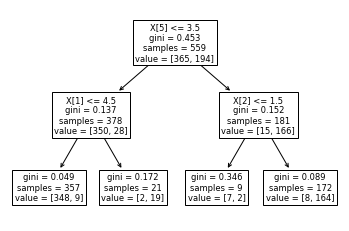

In [328]:
X = df.drop('Class (2 for benign, 4 for malignant)',axis=1)
y = df['Class (2 for benign, 4 for malignant)']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

In [82]:
def gini(p):
   return (p) * (1 - (p)) + (1 - p) * (1 - (1-p))

def entropy(p):
   return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

In [330]:
gini(365/559)

0.45321155526256

In [331]:
entropy(365/559)

0.9314042760464167

In [332]:
classification_error(365/559)

0.3470483005366727

In [333]:
entropy(365/559) - ((181/559) * entropy(15/181) + (378/559) * entropy(28/378))

0.5403309121448419

Entropy = 0.931\
Gini = 0.453\
Misclassification Error = 0.347\
Information Gain = 0.540\
The selected feature for the first split was "Bare Nuclei" and it splits between values <=3.5 and values greater than it.

=====PROBLEM 3=====

In [62]:
df = pd.read_csv("wdbc.data", names=['ID','Diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])
df = df.drop(columns=['ID'])
diagnosis = df['Diagnosis']
df = df.drop(columns=['Diagnosis'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[Text(167.4, 181.2, 'X[23] <= 884.55\ngini = 0.461\nsamples = 455\nvalue = [291, 164]'),
 Text(83.7, 108.72, 'X[27] <= 0.16\ngini = 0.154\nsamples = 310\nvalue = [284, 26]'),
 Text(41.85, 36.23999999999998, 'gini = 0.066\nsamples = 292\nvalue = [282, 10]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 14.99\ngini = 0.092\nsamples = 145\nvalue = [7, 138]'),
 Text(209.25, 36.23999999999998, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(292.95, 36.23999999999998, 'gini = 0.029\nsamples = 138\nvalue = [2, 136]')]

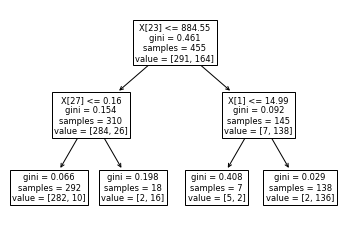

In [70]:
X = df
y = diagnosis

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

In [71]:
expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.88      0.98      0.93        66
           M       0.97      0.81      0.89        48

    accuracy                           0.91       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



In [63]:
pca = PCA(n_components=30)

bc = pca.fit_transform(df)
bcdf = pd.DataFrame(bc)
bcdf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,...,0.021189,0.000241,0.002528,0.011560,0.005773,0.001377,-0.001982,0.001293,0.001989,0.000704
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,...,0.005237,0.021069,0.001565,0.006968,-0.006978,0.001411,-0.000083,-0.001347,0.000686,-0.001061
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,...,-0.009865,-0.002394,-0.004125,-0.004007,0.000709,-0.003781,0.000178,0.000018,-0.000775,0.000405
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,...,0.011169,0.007063,0.001537,0.007003,-0.010261,-0.002899,0.000016,0.001369,-0.002139,-0.001657
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,...,-0.009916,0.010269,0.002204,0.002764,0.002455,0.001665,0.003290,0.000273,0.001783,0.000327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424,-0.786751,0.037082,-0.452530,-0.235185,...,-0.017214,0.007864,-0.002317,-0.002384,-0.003637,-0.008211,0.002418,0.001234,-0.000078,-0.000455
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637,0.449831,0.509154,-0.449986,0.493247,...,0.011219,-0.001905,-0.003028,-0.007931,0.002905,-0.002519,0.000212,0.001006,-0.000621,-0.000741
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726,-2.166493,-0.442279,-0.097398,-0.144667,...,-0.003362,-0.002249,-0.001248,-0.003927,-0.000921,0.000573,-0.001325,0.000025,0.000484,-0.000285
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390,-1.705401,-0.359964,0.385030,0.615467,...,-0.006130,-0.010804,0.005841,0.001127,-0.002646,0.001862,0.002698,0.001235,-0.000809,0.001217


[Text(167.4, 181.2, 'X[0] <= 54.079\ngini = 0.472\nsamples = 455\nvalue = [281, 174]'),
 Text(83.7, 108.72, 'X[0] <= -191.457\ngini = 0.195\nsamples = 310\nvalue = [276, 34]'),
 Text(41.85, 36.23999999999998, 'gini = 0.064\nsamples = 240\nvalue = [232, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.467\nsamples = 70\nvalue = [44, 26]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 260.355\ngini = 0.067\nsamples = 145\nvalue = [5, 140]'),
 Text(209.25, 36.23999999999998, 'gini = 0.293\nsamples = 28\nvalue = [5, 23]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 117\nvalue = [0, 117]')]

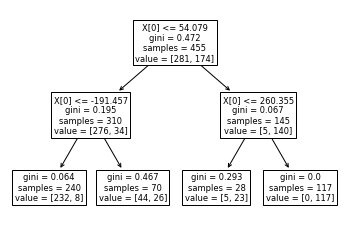

In [67]:
X = bcdf[[0]]
y = diagnosis

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

In [68]:
expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.88      0.97      0.93        76
           M       0.93      0.74      0.82        38

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.87       114
weighted avg       0.90      0.89      0.89       114



Using only one principal component, the values for the precision, recall, and F1-score are all pretty close to the original values. This is because the first principal component does a good job at capturing most of the information.

[Text(167.4, 181.2, 'X[0] <= 41.653\ngini = 0.46\nsamples = 455\nvalue = [292, 163]'),
 Text(83.7, 108.72, 'X[0] <= -196.667\ngini = 0.195\nsamples = 320\nvalue = [285, 35]'),
 Text(41.85, 36.23999999999998, 'gini = 0.064\nsamples = 241\nvalue = [233, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.45\nsamples = 79\nvalue = [52, 27]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 132.297\ngini = 0.098\nsamples = 135\nvalue = [7, 128]'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(292.95, 36.23999999999998, 'gini = 0.033\nsamples = 120\nvalue = [2, 118]')]

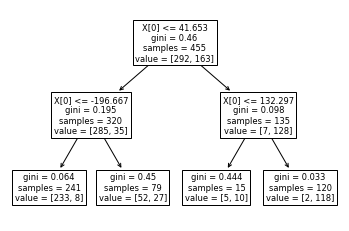

In [76]:
X = bcdf[[0, 1]]
y = diagnosis

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf)

In [77]:
expected = y_test
predicted = clf.predict(X_test)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.90      0.98      0.94        65
           M       0.98      0.86      0.91        49

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Using two principal components, it got even better results for precision, recall, and F1-score.

In [81]:
tn, fp, fn, tp = confusion_matrix(expected, predicted).ravel()
(tn, fp, fn, tp)

(64, 1, 7, 42)

1 false positive and 42 true positives. 1/114 and 42/114 are the false positive rate and true positive rate respectively.
Using continuous data is beneficial because the classification error is much lower and the precision and recall are fairly high.

=====PROBLEM 4=====

In [55]:
N = 1000
u0 = 5
s0 = 2
u1 = -5
s1 = 2

x0 = np.random.normal(u0,s0,N)
x1 = np.random.normal(u1,s1,N)
cl = np.random.randint(2, size=1000)

df = pd.DataFrame(dict(zip(['x0','x1', 'cl'],[x0,x1, cl])))
df.describe()

,x0,x1,cl
count,1000.000000,1000.000000,1000.000000
mean,4.798987,-5.026988,0.507000
std,1.990037,2.065757,0.500201
min,-2.467688,-10.524657,0.000000
25%,3.487232,-6.473656,0.000000
50%,4.858723,-5.020760,1.000000
75%,6.209986,-3.620304,1.000000
max,11.034457,1.302102,1.000000


[Text(167.4, 181.2, 'X[0] <= 5.083\ngini = 0.5\nsamples = 800\nvalue = [399, 401]'),
 Text(83.7, 108.72, 'X[0] <= 4.288\ngini = 0.495\nsamples = 437\nvalue = [240, 197]'),
 Text(41.85, 36.23999999999998, 'gini = 0.5\nsamples = 313\nvalue = [157, 156]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.443\nsamples = 124\nvalue = [83, 41]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 8.178\ngini = 0.492\nsamples = 363\nvalue = [159, 204]'),
 Text(209.25, 36.23999999999998, 'gini = 0.487\nsamples = 333\nvalue = [140, 193]'),
 Text(292.95, 36.23999999999998, 'gini = 0.464\nsamples = 30\nvalue = [19, 11]')]

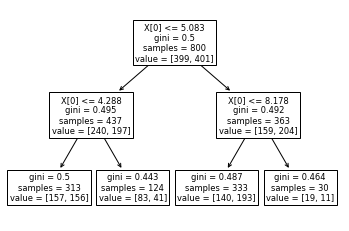

In [56]:
X = df.drop('cl', axis=1)
y = df['cl']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

bt = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)
bt = bt.fit(X_train, y_train)

expected = y_test
predicted = bt.predict(X_test)

tree.plot_tree(bt)

In [60]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x0)
ecdf(5.083)

0.551

It split on 5.083 of x0, which is really close to the mean of 4.799 for x0. This means the data was almost split in half which is backed up by the ecdf of our threshold being 0.551 (55% of our data is on the left side of the threshold). We also see that 437 of the samples ended up on the left side out of 800, so this makes sense.